# Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [102]:
df=pd.read_excel("avocado.xlsx")
df

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

# Exploratory Data Analysis:

In [103]:
df.shape

(18249, 14)

In [104]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [105]:
#Let's drop  Unnamed column
df.drop("Unnamed: 0",axis=1, inplace=True)

In [106]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [108]:
df["Month"] = df["Date"].dt.month

In [109]:
df["Day"] = df["Date"].dt.day

In [110]:
df.drop("Date",axis=1,inplace=True)

In [111]:
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[18249 rows x 14 columns]

In [112]:
df.columns

Index(['AveragePrice', 'Total Volume',           4046,           4225,
                 4770,   'Total Bags',   'Small Bags',   'Large Bags',
        'XLarge Bags',         'type',         'year',       'region',
              'Month',          'Day'],
      dtype='object')

In [113]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

<AxesSubplot:>

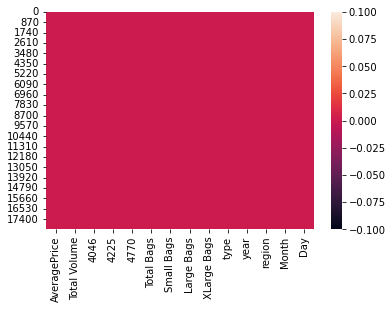

In [114]:
sns.heatmap(df.isnull())

# Data Visualisation:

Univariate Analysis

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

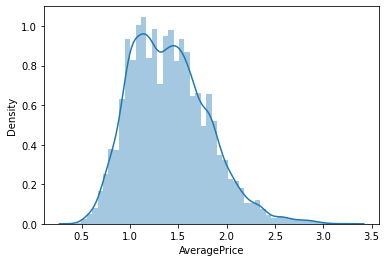

In [115]:
sns.distplot(df['AveragePrice'])

In [116]:
df.columns

Index(['AveragePrice', 'Total Volume',           4046,           4225,
                 4770,   'Total Bags',   'Small Bags',   'Large Bags',
        'XLarge Bags',         'type',         'year',       'region',
              'Month',          'Day'],
      dtype='object')

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

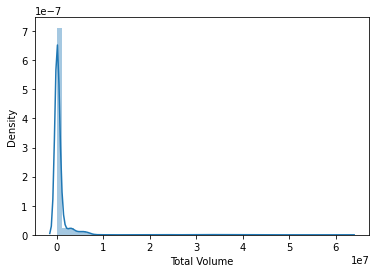

In [117]:
sns.distplot(df['Total Volume'])

<AxesSubplot:xlabel='type', ylabel='count'>

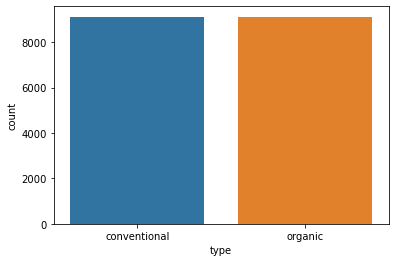

In [118]:
sns.countplot(df['type'])

conventional    9126
organic         9123
Name: type, dtype: int64


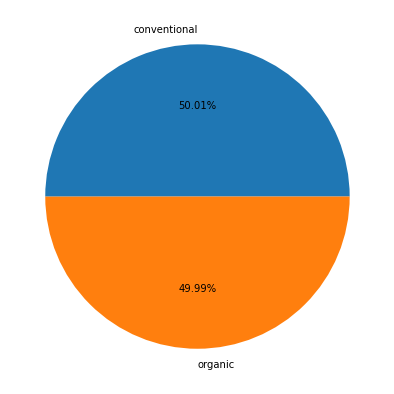

In [119]:
print(df["type"].value_counts())
fig,x = plt.subplots(figsize=(15,7))
labels='conventional','organic'
x.pie(df['type'].value_counts(),labels=labels,autopct='%0.2f%%')
plt.show()

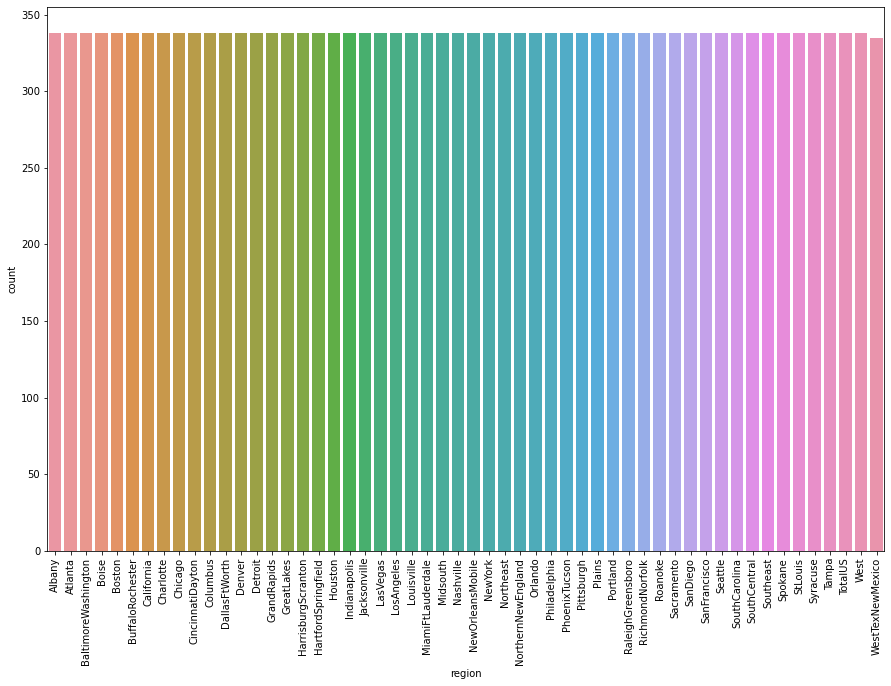

In [120]:
plt.figure(figsize=(15,10))
sns.countplot(df["region"])
plt.xticks(rotation=90)
plt.show()

Mulivariate Analysis:

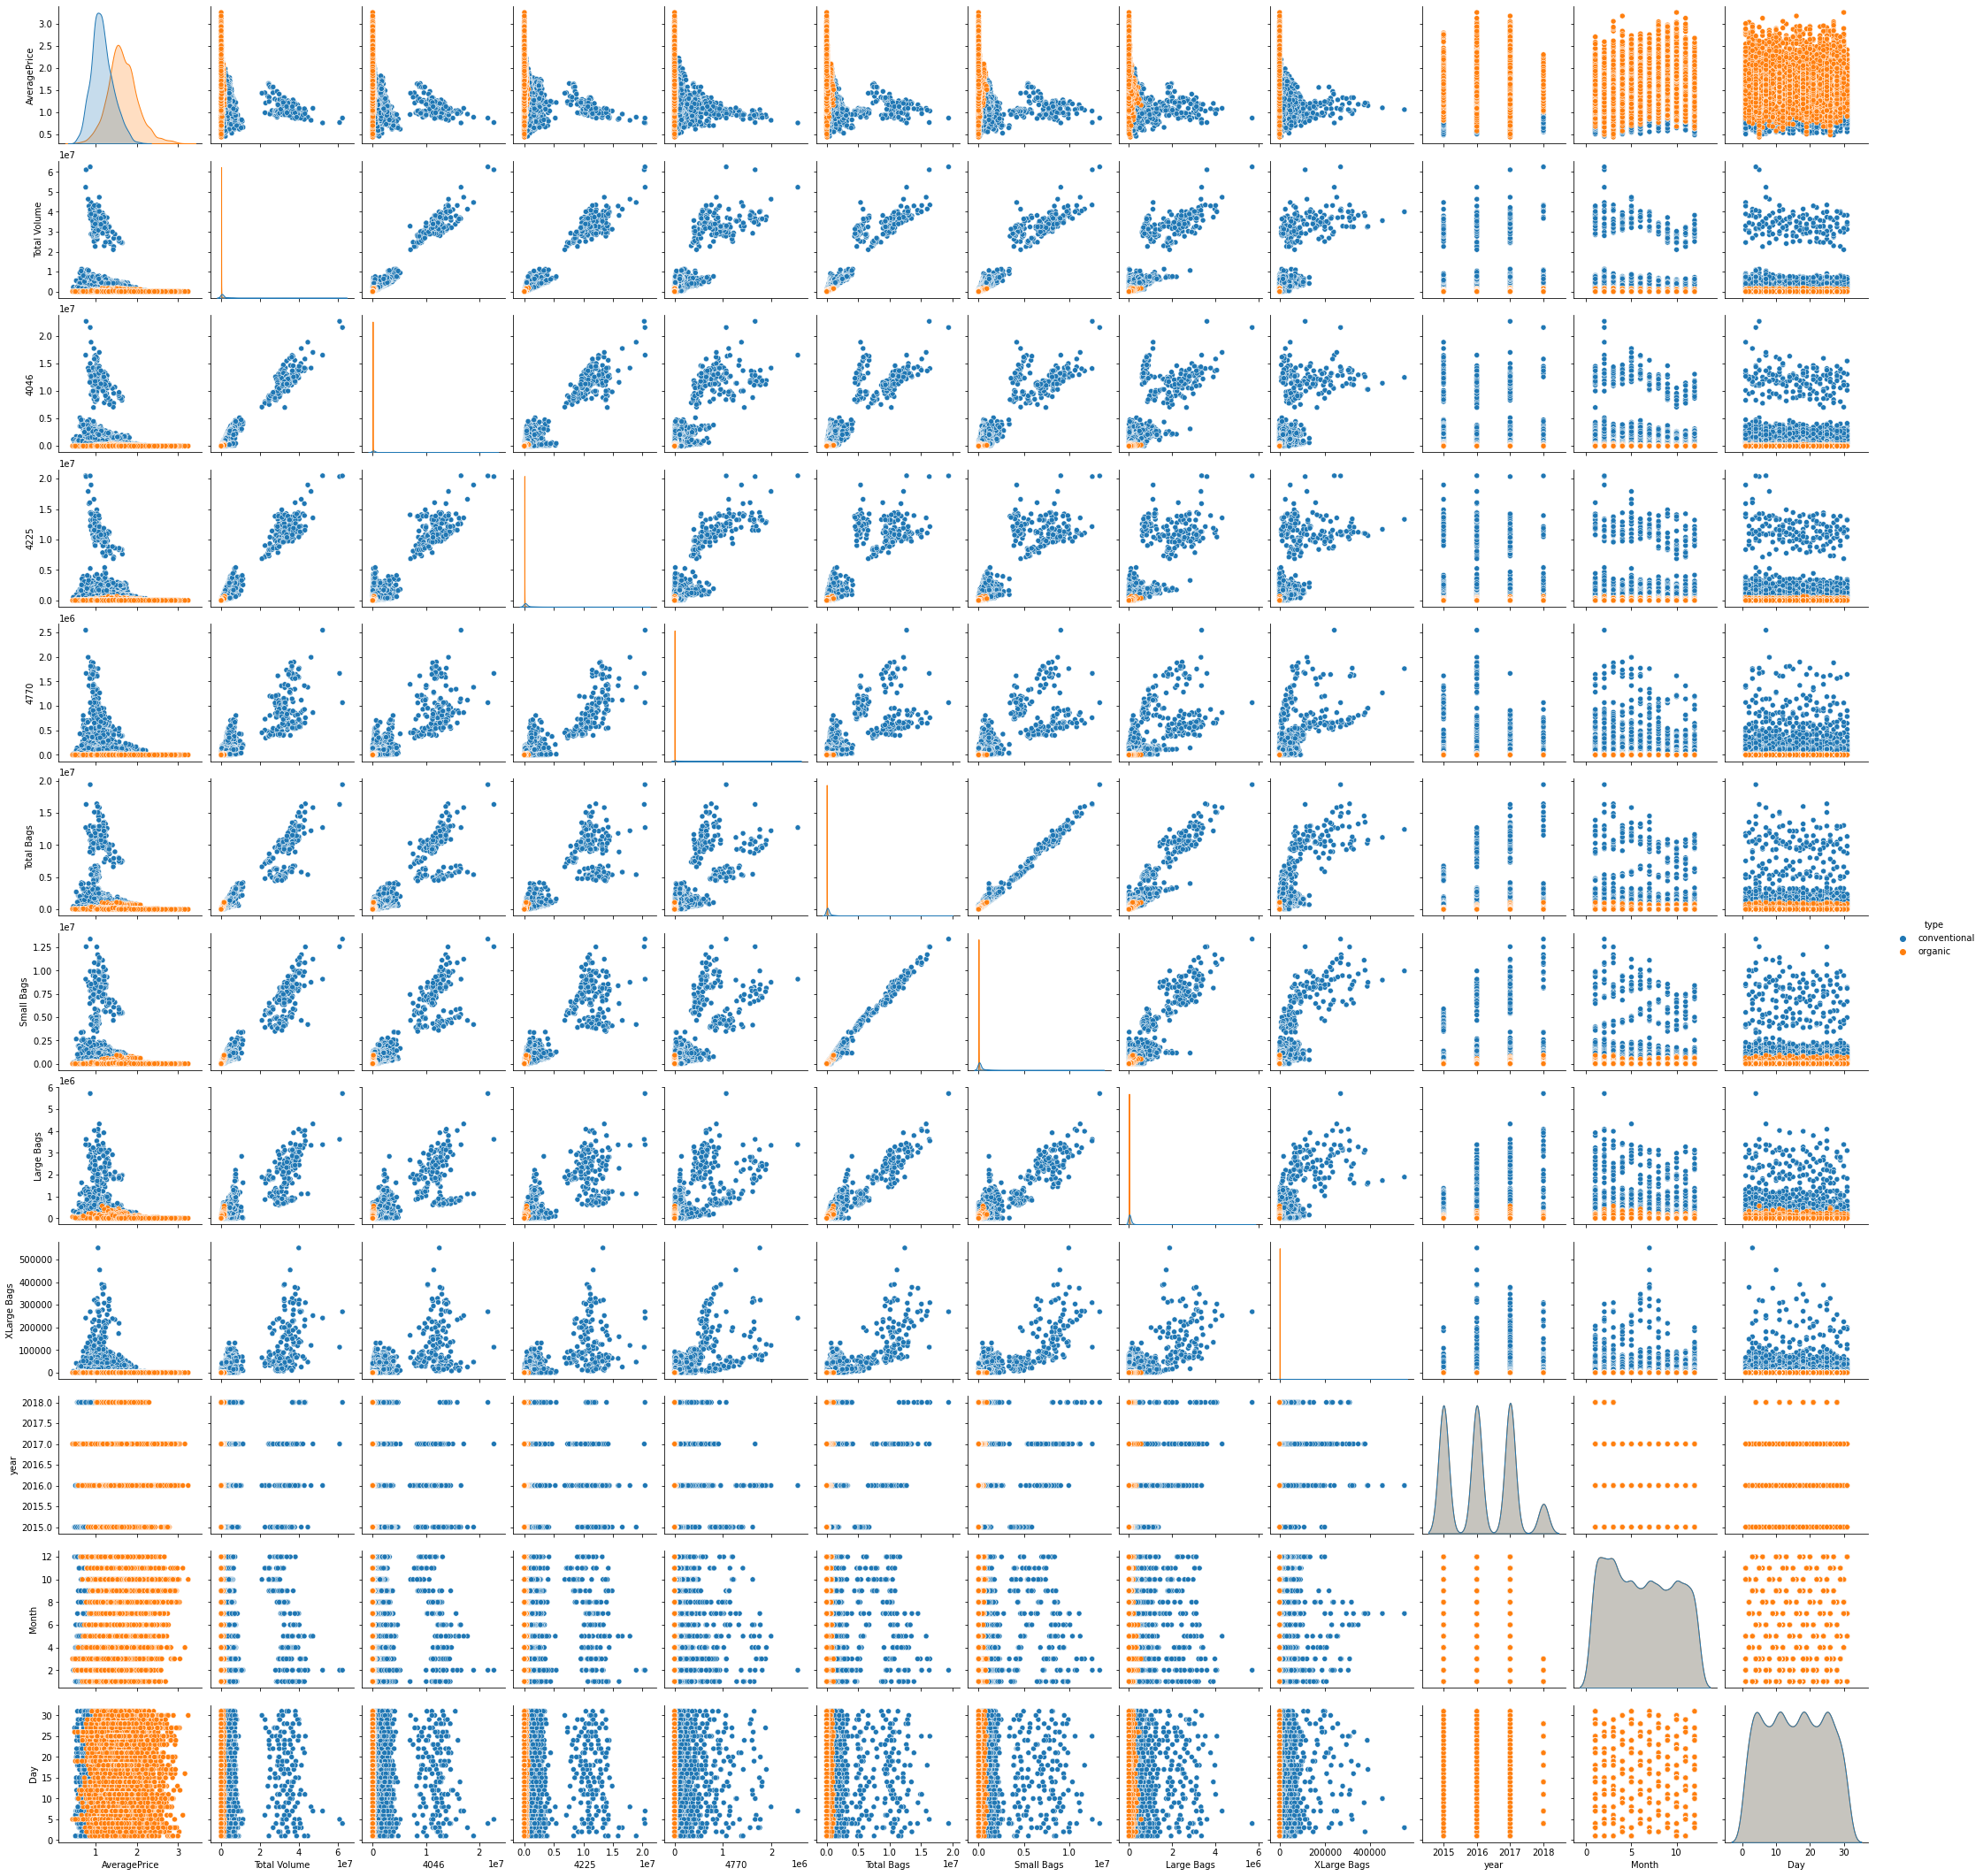

In [121]:
sns.pairplot(df,hue="type")

# Outliers:

<AxesSubplot:>

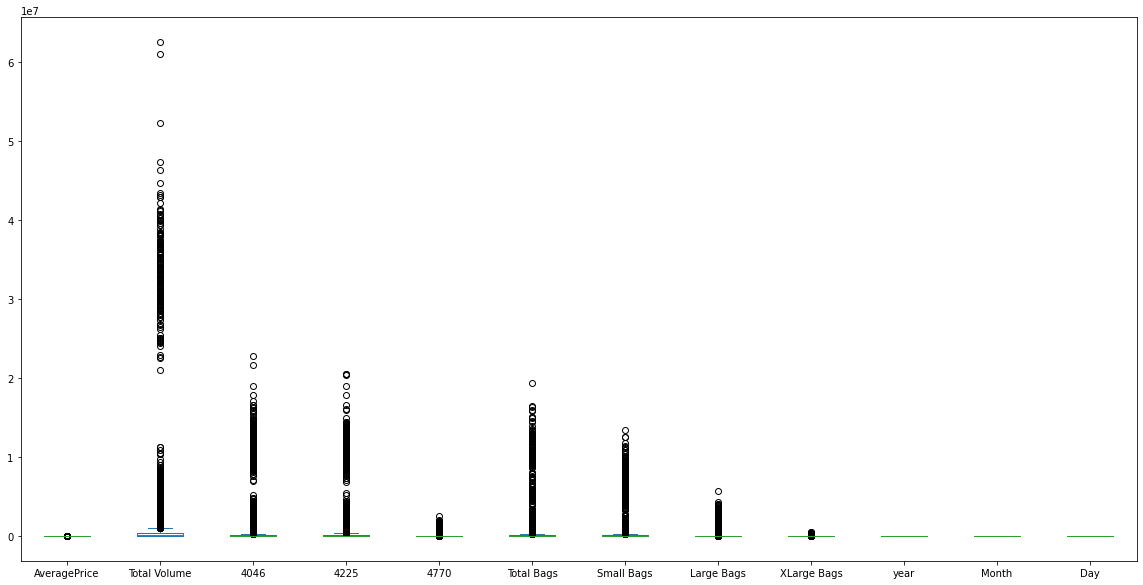

In [122]:
df.plot(kind='box',fontsize=10,figsize=(20,10))

# Removing Outliers:

In [123]:
df.columns

Index(['AveragePrice', 'Total Volume',           4046,           4225,
                 4770,   'Total Bags',   'Small Bags',   'Large Bags',
        'XLarge Bags',         'type',         'year',       'region',
              'Month',          'Day'],
      dtype='object')

In [124]:
df1=df.drop(columns=['AveragePrice','year','Month','Day','type','region',],axis=1).copy()

In [125]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
df_new=df[(z<3).all(axis=1)]
df_new

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17782 rows x 14 columns]

In [126]:
df.shape

(18249, 14)

In [127]:
df_new.shape

(17782, 14)

# Percentage of Loss:

In [128]:
Data_loss=(18249-17782)/18249*100
Data_loss

2.55904433119623

# Skewness:

In [129]:
df_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [137]:
cols=['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags']

In [138]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [139]:
df_new[cols] = Scaler.fit_transform(df_new[cols].values)

In [141]:
df_new[cols]

Total Volume  Total Bags  Small Bags  Large Bags  XLarge Bags
0         -0.065094   -0.527445   -0.337064   -0.775214    -0.675702
1         -0.137269   -0.488205   -0.301038   -0.765237    -0.675702
2          0.215503   -0.556204   -0.364044   -0.752534    -0.675702
3          0.029840   -0.702370   -0.500341   -0.693012    -0.675702
4         -0.170456   -0.675712   -0.479918   -0.600755    -0.675702
...             ...         ...         ...         ...          ...
18244     -0.668931   -0.331042   -0.165765   -0.405895    -0.675702
18245     -0.762380   -0.499550   -0.321645   -0.478556    -0.675702
18246     -0.766344   -0.493424   -0.303466   -0.945246    -0.675702
18247     -0.692595   -0.424475   -0.240252   -0.910471    -0.675702
18248     -0.658062   -0.383676   -0.201685   -1.042930    -0.675702

[17782 rows x 5 columns]

In [142]:
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

# Encoding:

In [152]:
#checking for nominal data
cat_col = ["type","region"]

In [153]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]=df_new[cat_col].apply(LE.fit_transform)

# Correlation:

In [154]:
df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
Month             0.162409     -0.024689 -0.025803 -0.022108 -0.033424   
Day               0.027386     -0.009747 -0.010159 -0.012393 -0.009009   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197   
Total Volume    0.963047    0.967238    0.880640     0.747157  0.017193   
4046            0.920057    0.925280    0.838645     0.699377  0.003353   
4225            0.905787    0.916031    0.810015     0.688809 -0.009559   
4770            0.792314    0.802733    0.698471     0.679861 -0.036531   
Total Bags      1.000000    0.994335    0.943009     0.804233  0.071552   
Small Bags      0.994335    1.000000    0.902589     0.806845  0.063915   
Large Bags      0.943009    0.902589    1.000000     0.710858  0.087891   
XLarge Bags     0.804233    0.806845    0.710858     1.000000  0.081033   
year            0.071552    0.063915    0.087891     0.081033  1.000000   
Month          -0.022724   -0.023126   -0.020187    -0.012969 -0.177050   
Day            -0.004988   -0.003870   -0.008352     0.000319  0.004475   

                 Month       Day  
AveragePrice  0.162409  0.027386  
Total Volume -0.024689 -0.009747  
4046         -0.025803 -0.010159  
4225         -0.022108 -0.012393  
4770         -0.033424 -0.009009  
Total Bags   -0.022724 -0.004988  
Small Bags   -0.023126 -0.003870  
Large Bags   -0.020187 -0.008352  
XLarge Bags  -0.012969  0.000319  
year         -0.177050  0.004475  
Month         1.000000  0.010621  
Day           0.010621  1.000000

<AxesSubplot:>

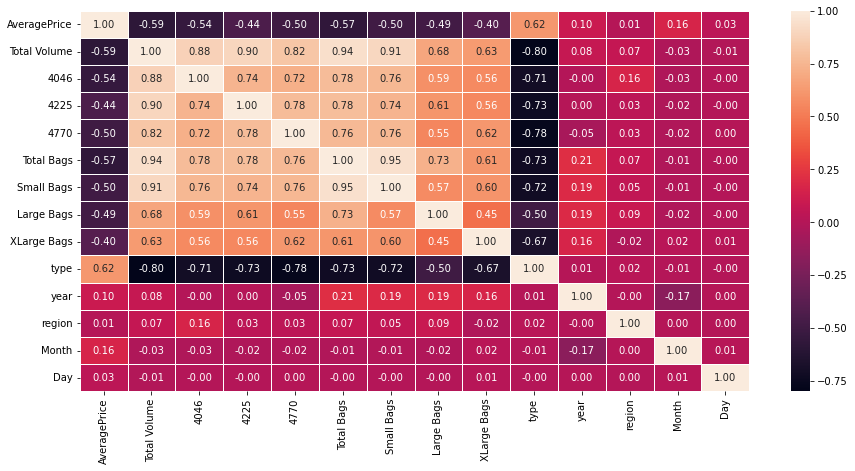

In [157]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5,fmt='.2f')

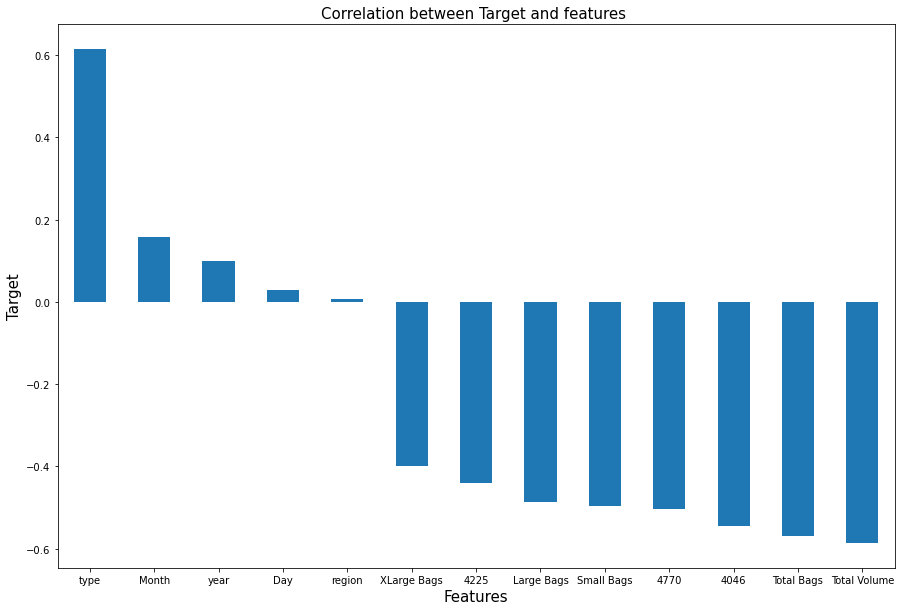

In [159]:
plt.figure(figsize=(15,10))
df_new.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.xticks(rotation=360)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()

In [160]:
x = df_new.drop('AveragePrice',axis=1)
y = df_new['AveragePrice']

# Scaling:

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.581441  0.436485 -0.239935   -0.527445   -0.337064   
1         -0.137269 -0.713611  0.364388 -0.193155   -0.488205   -0.301038   
2          0.215503 -0.663134  0.688705  0.004847   -0.556204   -0.364044   
3          0.029840 -0.554426  0.537673 -0.139603   -0.702370   -0.500341   
4         -0.170456 -0.611059  0.357825 -0.129013   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
17777     -0.668931 -0.372332 -0.859180 -1.208956   -0.331042   -0.165765   
17778     -0.762380 -0.538631 -0.566134 -1.208956   -0.499550   -0.321645   
17779     -0.766344 -0.538574 -0.687886  0.430905   -0.493424   -0.303466   
17780     -0.692595 -0.462298 -0.617164  0.430587   -0.424475   -0.240252   
17781     -0.658062 -0.265776 -0.702464  0.139051   -0.383676   -0.201685   

       Large Bags  XLarge Bags      type      year    region     Month  \
0       -0.775214    -0.685946 -1.026443 -1.214908 -1.698613  1.641434   
1       -0.765237    -0.685946 -1.026443 -1.214908 -1.698613  1.641434   
2       -0.752534    -0.685946 -1.026443 -1.214908 -1.698613  1.641434   
3       -0.693012    -0.685946 -1.026443 -1.214908 -1.698613  1.641434   
4       -0.600755    -0.685946 -1.026443 -1.214908 -1.698613  1.358706   
...           ...          ...       ...       ...       ...       ...   
17777   -0.405895    -0.685946  0.974238  1.979143  1.742552 -1.185845   
17778   -0.478556    -0.685946  0.974238  1.979143  1.742552 -1.468572   
17779   -0.945246    -0.685946  0.974238  1.979143  1.742552 -1.468572   
17780   -0.910471    -0.685946  0.974238  1.979143  1.742552 -1.468572   
17781   -1.042930    -0.685946  0.974238  1.979143  1.742552 -1.468572   

            Day  
0      1.289235  
1      0.491750  
2     -0.305734  
3     -1.103219  
4      1.517088  
...         ...  
17777 -1.331072  
17778  1.403161  
17779  0.605677  
17780 -0.191808  
17781 -0.989293  

[17782 rows x 13 columns]

# Variance Inflation Factor:

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values      Features
0    43.994733  Total Volume
1     5.733066          4046
2     7.906143          4225
3     3.945900          4770
4    33.435512    Total Bags
5    16.706282    Small Bags
6     3.420520    Large Bags
7     2.059844   XLarge Bags
8     3.709780          type
9     1.379985          year
10    1.076363        region
11    1.055094         Month
12    1.000825           Day

In [166]:
x.drop("Total Volume",axis=1, inplace=True)

In [167]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values     Features
0     3.381424         4046
1     3.592714         4225
2     3.941133         4770
3    24.406223   Total Bags
4    16.606599   Small Bags
5     3.401950   Large Bags
6     2.059664  XLarge Bags
7     3.534226         type
8     1.349238         year
9     1.072334       region
10    1.049707        Month
11    1.000648          Day

In [168]:
x.drop("Total Bags",axis=1, inplace=True)

In [169]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values     Features
0     3.363805         4046
1     3.487351         4225
2     3.940974         4770
3     3.733196   Small Bags
4     1.831630   Large Bags
5     2.059652  XLarge Bags
6     3.531241         type
7     1.329826         year
8     1.072331       region
9     1.049261        Month
10    1.000451          Day

# Best Random State:

In [181]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy Score is: ",maxAccu,"on Random_state: ",maxRS)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Random Forest Regressor:

In [185]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)

Accuracy_score is  0.8888145790881459


# Decision Tree Regressor:

In [186]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)

Accuracy_score is  0.7630496731928378


# K-Neighbors Regressor:

In [187]:
KN=KNeighborsRegressor()
KN.fit(x_train,y_train)
pred=KN.predict(x_test)
acc=r2_score(y_test,pred)
print('Accuracy_score is ',acc)

Accuracy_score is  0.7931407080420144


# Cross Validation:

In [190]:
from sklearn.model_selection import cross_val_score
for i in range(2,20):
    cr=cross_val_score(RFR,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  2
cross val score =  -90.05054571784285
at cv=  3
cross val score =  12.450069189855173
at cv=  4
cross val score =  14.055337675683713
at cv=  5
cross val score =  26.976452293177644
at cv=  6
cross val score =  25.03249720219392
at cv=  7
cross val score =  33.458024893909574
at cv=  8
cross val score =  33.74071975087578
at cv=  9
cross val score =  42.0649797191414
at cv=  10
cross val score =  43.406180968936106
at cv=  11
cross val score =  42.1774240965084
at cv=  12
cross val score =  45.563038549524784
at cv=  13
cross val score =  47.092999129466584
at cv=  14
cross val score =  45.71004137114646
at cv=  15
cross val score =  46.69936102555164
at cv=  16
cross val score =  46.287649952474354
at cv=  17
cross val score =  48.01102029676246
at cv=  18
cross val score =  47.21521110877749
at cv=  19
cross val score =  48.56404039701344


In [ ]:
print(cross_val_score(DTR,x,y,cv=17).mean())

In [ ]:
print(cross_val_score(RFR,x,y,cv=17).mean())

In [ ]:
print(cross_val_score(KN,x,y,cv=17).mean())

# Hyperparameter Tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
GCV=GridSearchCV(rfc,parameters,cv=17,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

# Saving the Model:

In [ ]:
import pickle
filename='Avocado.pkl'
pickle.dump(RFR, open(filename,'wb'))

# Now,let's take Region as Target variable

In [194]:
df=pd.read_excel('avocado.xlsx')
df

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

# EDA:

In [195]:
df.shape

(18249, 14)

In [196]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [197]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [199]:
df=df.drop(["Unnamed: 0"],axis=1)

In [200]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

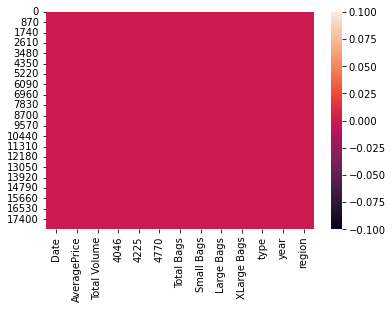

In [201]:
import seaborn as sns  #import seaborn for visualization
sns.heatmap(df.isnull())

In [204]:
df.loc[df['region'] == " "]

Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []

In [205]:
df["Month"] = df["Date"].dt.month

In [206]:
df["Day"] = df["Date"].dt.day

In [207]:
df.drop("Date",axis=1,inplace=True)

# Data Visualisation:

conventional    9126
organic         9123
Name: type, dtype: int64


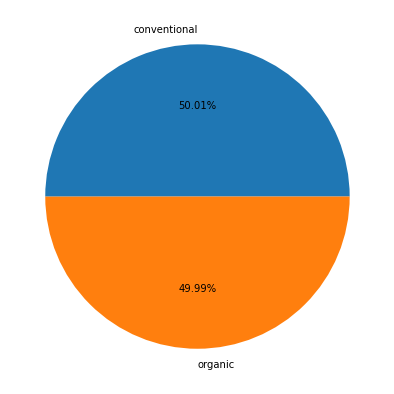

In [208]:
print(df["type"].value_counts())
fig,x = plt.subplots(figsize=(15,7))
labels='conventional','organic'
x.pie(df['type'].value_counts(),labels=labels,autopct='%0.2f%%')
plt.show()

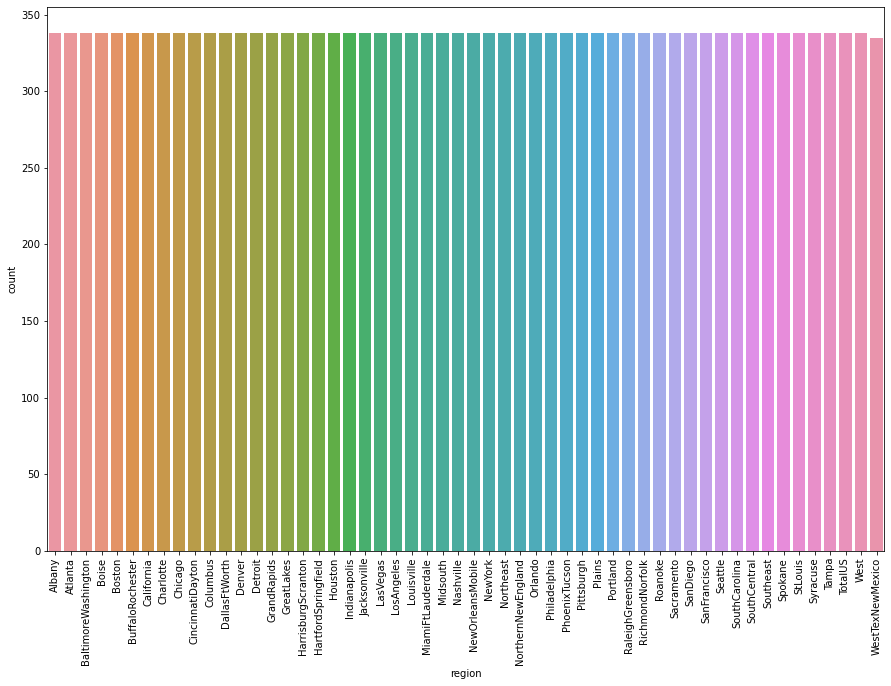

In [209]:
plt.figure(figsize=(15,10))
sns.countplot(df["region"])
plt.xticks(rotation=90)
plt.show()

KeyboardInterrupt: 

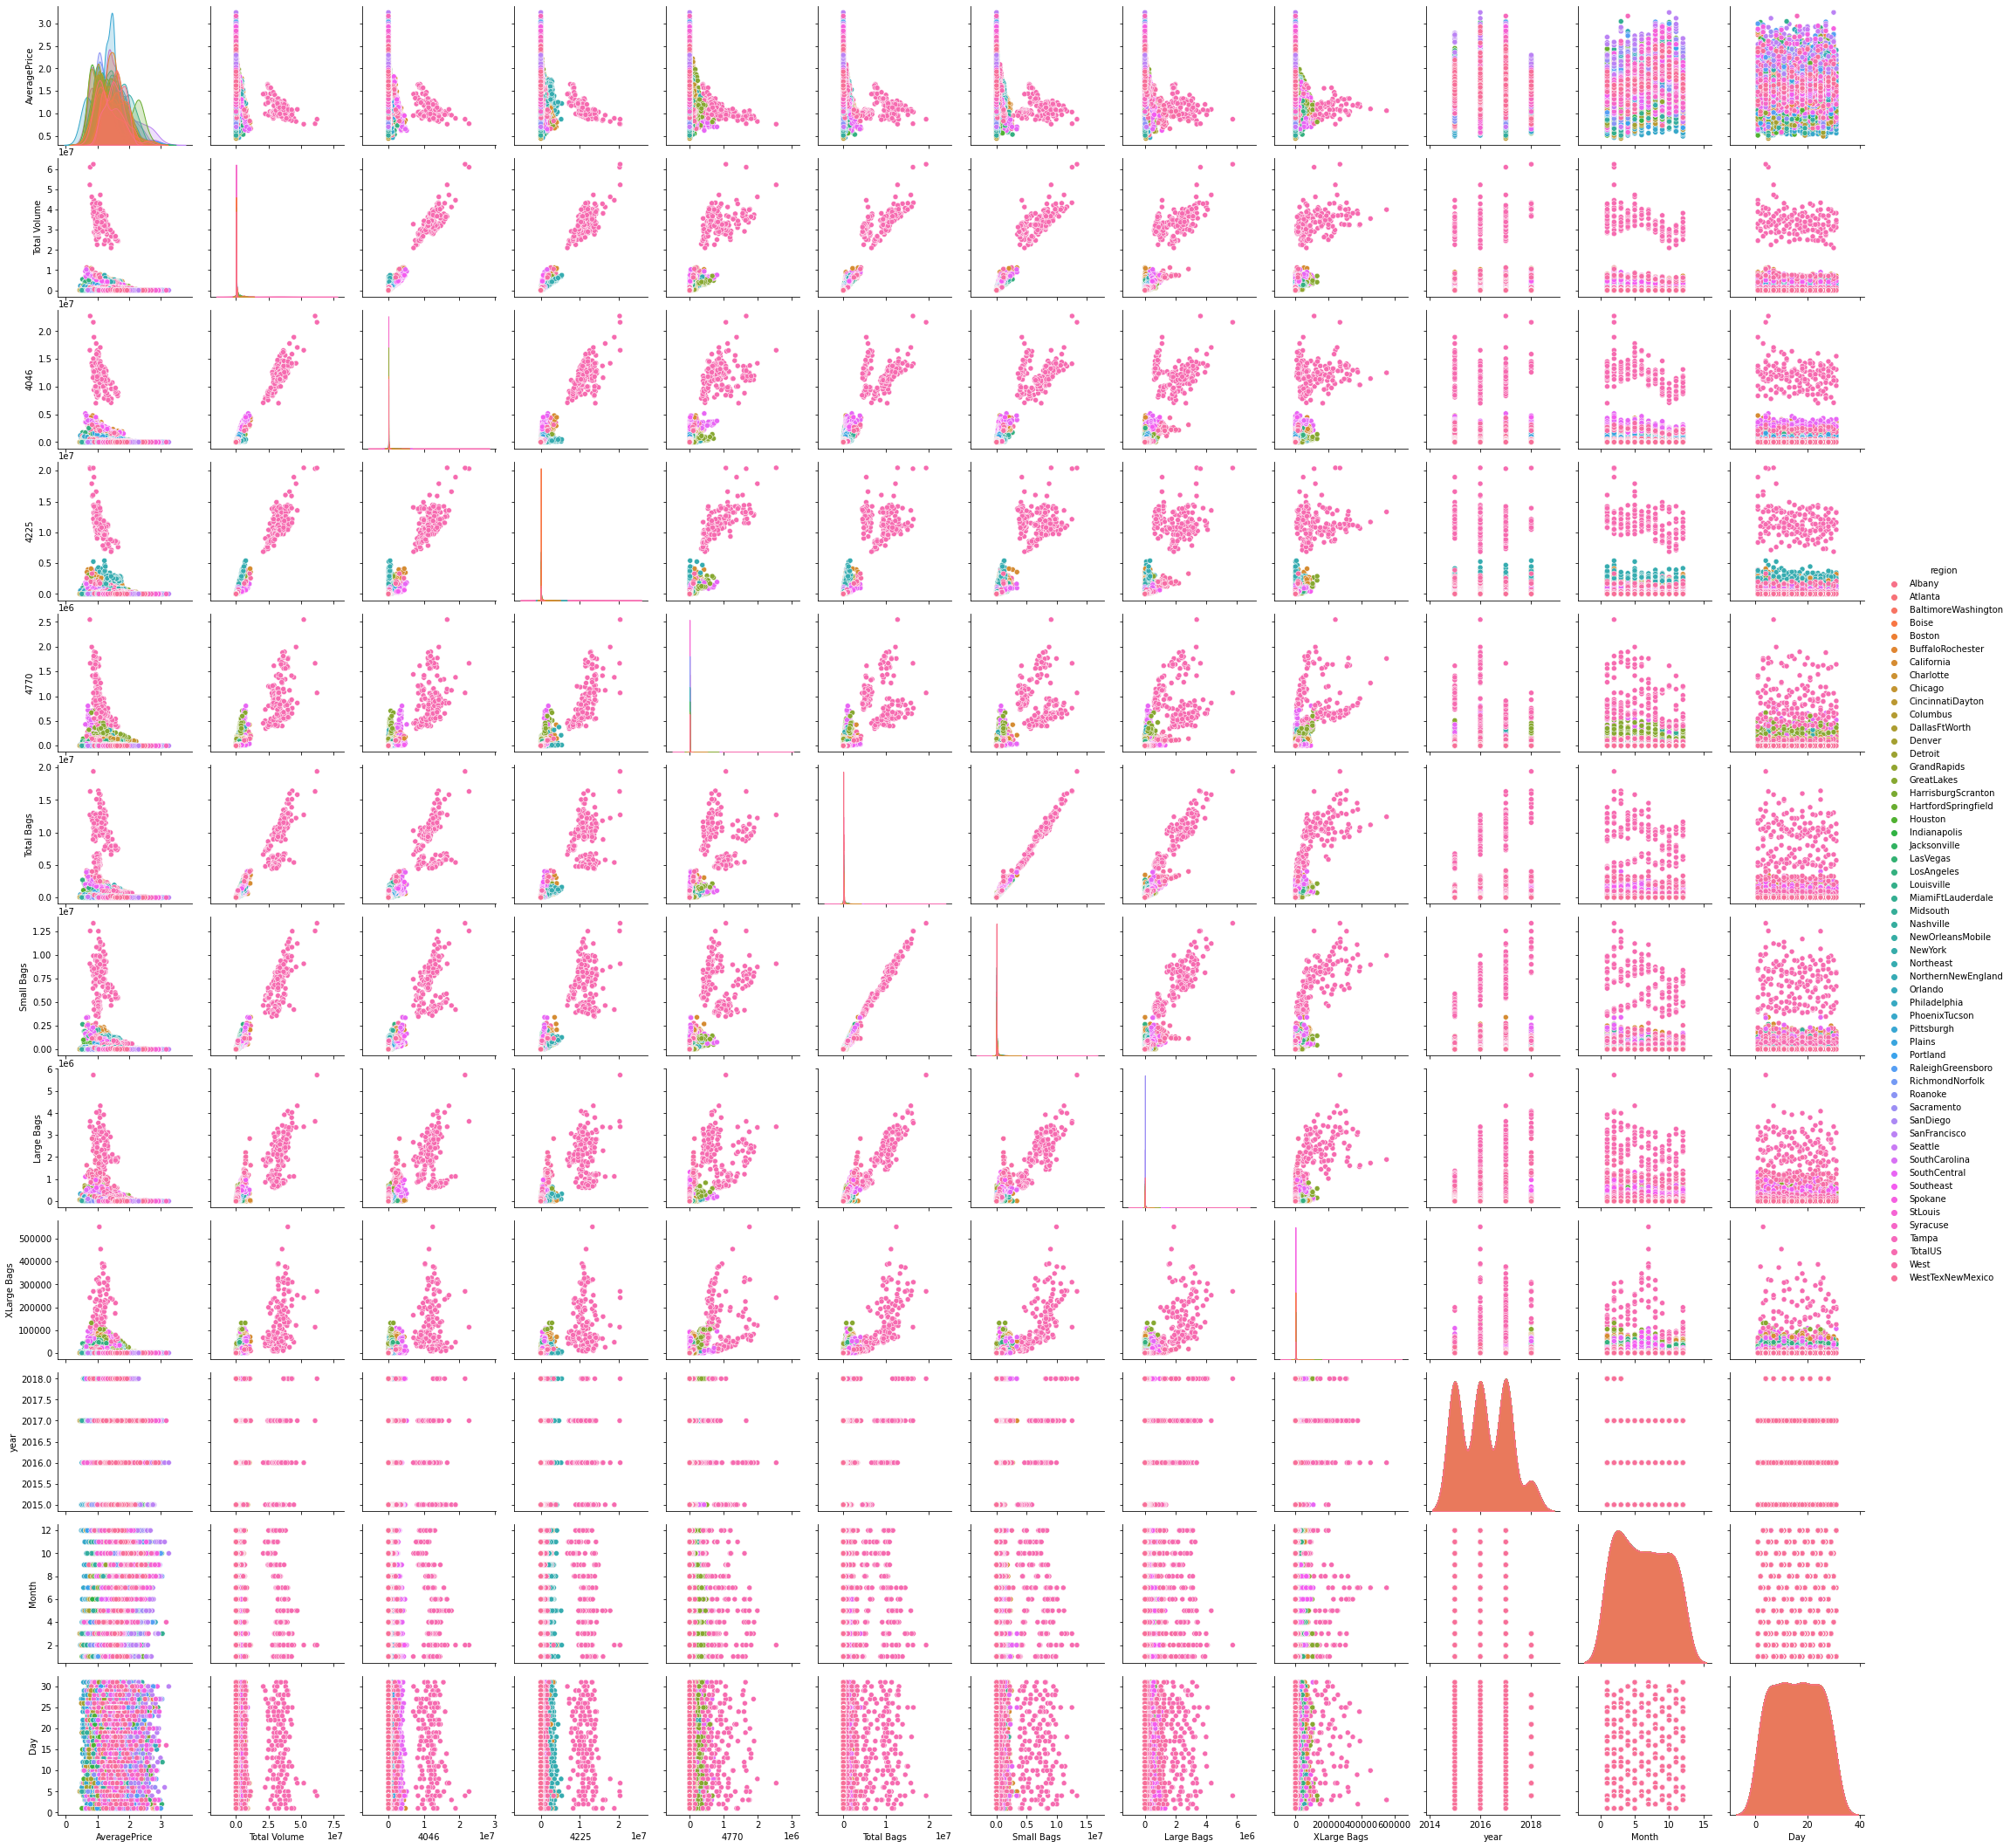

In [210]:
sns.pairplot(df,hue="region")

# Outliers:

In [ ]:
df.plot(kind='box',fontsize=10,figsize=(20,10))

# Removing Outliers:

In [ ]:
df.columns

In [ ]:
df1=df.drop(columns=['AveragePrice','year','Month','Day','type','region',],axis=1).copy()

In [ ]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
df_new=df[(z<3).all(axis=1)]
df_new

In [ ]:
df.shape

In [ ]:
df_new.shape

# Skewness:

In [ ]:
df_new.skew()

In [ ]:
cols=['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags']

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Encoding:

In [ ]:
cat_col = ["type","region"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]=df_new[cat_col].apply(LE.fit_transform)

# Correlation:

In [ ]:
df_new.corr()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5,fmt='.2f')

In [ ]:
plt.figure(figsize=(15,10))
df_new.corr()['region'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.xticks(rotation=360)
plt.title('Correlation between Target and features ',fontsize=15)
plt.show()

In [ ]:
x = df_new.drop('region',axis=1)
y = df_new['region']

# Scaling:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

# Variance Inflation Factor:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

In [ ]:
x.drop("Total Volume",axis=1, inplace=True)

In [ ]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

In [ ]:
x.drop("Total Bags",axis=1, inplace=True)

In [ ]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

# Best Random State:

In [ ]:
from sklearn.tree import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred = RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Decision Tree Classifier:

In [ ]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)
print('Accuracy_Score is ',acc)
print('Confusion_Matrix is ',confusion_matrix(y_test,predDTC))
print('Classification_Report is ','\n',classification_report(y_test,predDTC))

# Random Forest Classssifier:

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is ',acc)
print('Confusion_Matrix is ',confusion_matrix(y_test,pred))
print('Classification_Report is ','\n',classification_report(y_test,pred))

# KNeighbors Classifier:

In [ ]:
kn=KNC()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

# Cross Validation:

In [ ]:
from sklearn.model_selection import cross_val_score
for i in range(2,15):
    cr=cross_val_score(DTC,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

In [ ]:
print(cross_val_score(DTC,x,y,cv=47).mean())

In [ ]:
print(cross_val_score(rfc,x,y,cv=47).mean())

In [ ]:
print(cross_val_score(kn,x,y,cv=47).mean())

In [ ]:
print(cross_val_score(ABC,x,y,cv=47).mean())

# Saving the Model:

In [ ]:
import pickle
filename='Avocado.pkl'
pickle.dump(rfc,open(filename,'wb'))